In [1]:
%load_ext autoreload
%autoreload 2

from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [2]:
import pandas as pd
import numpy as np
import random
import torch
import transformers
import matplotlib.pyplot as plt
import seaborn as sns

In [10]:
doordash_train = pd.read_csv("../data/doordash/all_train.csv")
doordash_test = pd.read_csv("../data/doordash/all_test.csv")
doordash_all = pd.concat([doordash_train, doordash_test], ignore_index=True)

doordash_test

,Business,Name,L1,L2,L1 ID,L2 ID,Train
0,Circle K,ritas flavored malt beverage grape ahh rita 8 ...,Alcohol,Seltzer,alcohol,seltzer,False
1,Circle K,ritas flavored malt beverage cran ber rita mal...,Alcohol,Seltzer,alcohol,seltzer,False
2,Circle K,natural light seltzer flavored malt beverage c...,Alcohol,Seltzer,alcohol,seltzer,False
3,Circle K,smirnoff ice flavored malt beverage malt bottl...,Alcohol,Seltzer,alcohol,seltzer,False
4,Circle K,mike's harder strawberry lemonade flavored mal...,Alcohol,Seltzer,alcohol,seltzer,False
...,...,...,...,...,...,...,...
11345,Walgreens,peak power steering fluid (12 oz),Household,Automotive,household,automotive,False
11346,Walgreens,complete home giant auto home t handle roller ...,Household,Automotive,household,automotive,False
11347,Walgreens,"living solutions felt glides 1.25"" (6 ct)",Household,Automotive,household,automotive,False
11348,Walgreens,glade membrane air freshener (0.14 oz),Household,Automotive,household,automotive,False


In [18]:
google_train = pd.read_csv("../data/google/all_train.csv")
google_test = pd.read_csv("../data/google/all_test.csv")
google_all = pd.concat([google_train, google_test], ignore_index=True)

google_all

,Business,Name,L1,L2,L1 ID,L2 ID
0,Chewy.com,Tiki Cat Born Carnivore Chicken Luau Dry Cat F...,Pet Care,Cat Food,pet_care,cat_food
1,nearby at Grainger Industrial Supply,Sqwincher Qwik Stik Grape S4832799,Drinks,Energy,drinks,energy
2,eBay,"INEVIFIT Bathroom Scale, Highly Accurate Digit...",Personal Care,Home Diagnostics,personal_care,home_diagnostics
3,Chewy.com,Pets First Los Angeles Rams Pet T-Shirt - X-Large,Pet Care,Pet Accessories,pet_care,pet_accessories
4,Chewy.com,Evangers Super Premium Hand-Packed Whole Chick...,Pet Care,Dog Food,pet_care,dog_food
...,...,...,...,...,...,...
199722,Target,"Crest 3D White Anticavity Toothpaste, Fluoride...",Personal Care,Oral Health,personal_care,oral_health
199723,Pharmaca,"Whole Earth & Sea - Vitamin D3 5000 IU, 60 Veg...",Vitamins,Supplements,vitamins,supplements
199724,nearby at Target,Grab and Go! Pringles Stack Potato Crisps- 2.3...,Snacks,Chips,snacks,chips
199725,Walmart - Sshop,St. Tropez Self Tan 13.5-ounce Bronzing Mousse...,Personal Care,Sun Care,personal_care,sun_care


In [17]:
instacart_train = pd.read_csv("../data/instacart/all_train.csv")
instacart_test = pd.read_csv("../data/instacart/all_test.csv")
instacart_all = pd.concat([instacart_train, instacart_test], ignore_index=True)

instacart_all

,Business,Name,L1,L2,L1 ID,L2 ID
0,Giant Food,Bob's Red Mill Organic Whole Grain Corn Flour ...,Pantry,Baking,pantry,baking
1,Weavers Way Co-op,Arrowhead Mills Organic Oat Flour (24 oz),Pantry,Baking,pantry,baking
2,Stop & Shop,Burpee Bachelor's Buttons Seeds (1 ct),Household,Floral,household,floral
3,BJ's Wholesale Club,Gain AromaBoost Ultra Concentrated Liquid Laun...,Household,Laundry,household,laundry
4,Plum Market,Boar's Head Fully Cooked Bacon Thick Cut - 8 C...,Frozen,Meats,frozen,meats
...,...,...,...,...,...,...
20970,Dean's Natural Foods,Annie's Homegrown Vinaigrette Shiitake Sesame ...,Pantry,Multivitamins,pantry,multivitamins
20971,Sprouts Farmers Market,Raos Meatballs & Sauce (24 oz),Fresh Food,Entree,fresh_food,entree
20972,Sigona's Farmers Market,Kuhne Traditional German Barrel Sauerkraut (28...,Pantry,Pickles,pantry,pickles
20973,United Supermarkets OK,Hostess Cherry Mini Fruit Pies (12 oz),Bakery,Desserts,bakery,desserts


## L1 class frequencies

By Percentage Frequency

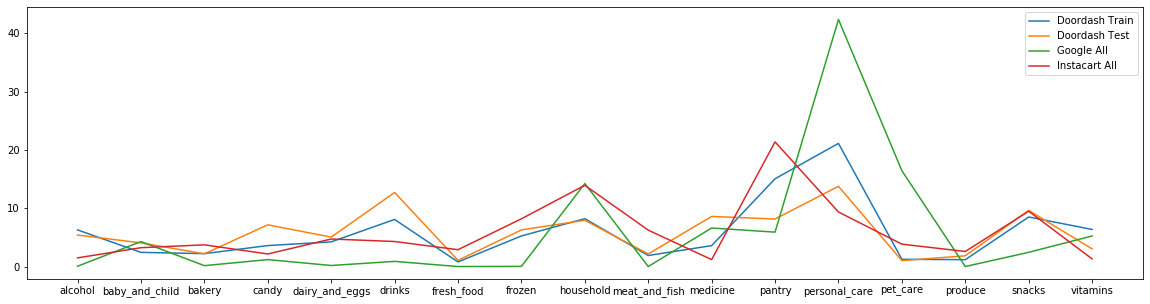

In [89]:
counts = pd.DataFrame({
    "Doordash Train": doordash_train["L1 ID"].value_counts() * 100 / len(doordash_train),
    "Doordash Test": doordash_test["L1 ID"].value_counts() * 100 / len(doordash_test),
    "Google All": google_all["L1 ID"].value_counts() * 100 / len(google_all),
    "Instacart All": instacart_all["L1 ID"].value_counts() * 100 / len(instacart_all)
})

plot = counts.plot(y=["Doordash Train", "Doordash Test", "Google All", "Instacart All"], figsize=(20, 5))
plot.set_xticks(range(len(counts)))
plot.set_xticklabels(list(counts.index))
plot

Absolute number of samples

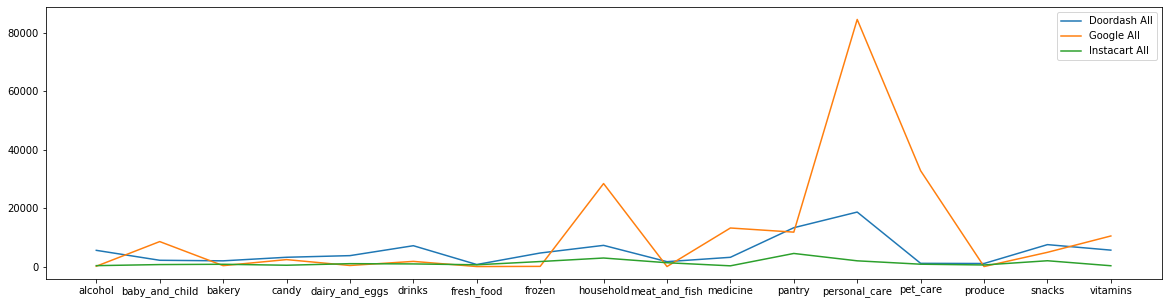

In [90]:
counts = pd.DataFrame({
    "Doordash All": doordash_train["L1 ID"].value_counts(),
    "Google All": google_all["L1 ID"].value_counts(),
    "Instacart All": instacart_all["L1 ID"].value_counts()
})

plot = counts.plot(y=["Doordash All", "Google All", "Instacart All"], figsize=(20, 5))
plot.set_xticks(range(len(counts)))
plot.set_xticklabels(list(counts.index))
plot

## L2 Class Frequencies

In [41]:
scraped = pd.DataFrame({    
    "Google All": google_all.groupby(["L1 ID", "L2 ID"]).size().replace('NaN', 0),
    "Instacart All": instacart_all.groupby(["L1 ID", "L2 ID"]).size().replace('NaN', 0)
})

In [42]:
# samples per L2 class
class_data = pd.DataFrame({
    "Doordash Train": doordash_train.groupby(["L1 ID", "L2 ID"]).size(), 
    "Doordash Test": doordash_test.groupby(["L1 ID", "L2 ID"]).size(), 
    "Scraped": scraped.sum(axis=1, min_count=1),
})

pd.options.display.float_format = '{:,.0f}'.format

print(class_data.sort_values('Doordash Train', ascending=False).to_string())

pd.reset_option('^display.', silent=True)

                                      Doordash Train  Doordash Test  Scraped
L1 ID          L2 ID                                                        
personal_care  makeup                          5,694             55   17,043
               hair_care                       3,037            120   12,218
alcohol        wine                            2,338            105       71
vitamins       supplements                     2,259             97    9,396
alcohol        beer                            2,086            357       71
personal_care  facial_care                     1,770             80    8,196
snacks         chips                           1,676            261      436
candy          chocolate                       1,587            435      723
household      cleaning                        1,461            169   11,356
drinks         soda                            1,363            244      206
               juice                           1,357            208      421

## Predictions

For every L1 and L2 category, we need to extract two scores: (train doordash --> test doordash) and (train doordash + google --> test doordash)

In [78]:
doordash_accs = {}  # key = (l1, l2) value = acc
scraped_accs = {}  # key = (l1, l2) value = acc

In [79]:
# Given predictions, calculate the accuracy per sub-category
def get_accuracies(category_id, preds, accs_dict):
    scores = preds["Pred"] == preds["Category ID"]
    accs = scores.groupby(preds["Category ID"]).mean()
    
    for subcategory_id, acc in zip(list(accs.index), list(accs)):
        accs_dict[(category_id, subcategory_id)] = [acc]

In [80]:
import os

def eval_predictions(dir_path, accs_dict):
    # key = category id, value = data frame
    predictions = {}  

    for filename in os.listdir(dir_path):
        category_id = filename[:-4]  # strip .csv
        filepath = os.path.join(dir_path, filename)

        # store (category id, predictions)
        predictions[category_id] = pd.read_csv(filepath)

    for category_id, preds in predictions.items():
        get_accuracies(category_id, preds, accs_dict)
    
    return predictions

In [81]:
doordash_preds = eval_predictions("../preds/doordash", doordash_accs)
scraped_preds = eval_predictions("../preds/doordash-google-instacart", scraped_accs)

#### L1

In [91]:
supervised_l1_accs = []
scraped_l1_accs = []

for (l1, l2), [acc] in doordash_accs.items():
    if l1 == 'grocery':
        supervised_l1_accs.append((l2, acc))

for (l1, l2), [acc] in scraped_accs.items():
    if l1 == 'grocery':
        scraped_l1_accs.append((l2, acc))
        
l1_accs = pd.DataFrame({
    'Supervised Acc': pd.Series({k: v for k, v in supervised_l1_accs}),
    'Scraped Acc': pd.Series({k: v for k, v in scraped_l1_accs}),
    'Supervised Data': counts["Doordash All"],
    'Scraped Data': counts["Instacart All"] + counts["Google All"]
})

In [92]:
l1_accs

,Supervised Acc,Scraped Acc,Supervised Data,Scraped Data
alcohol,0.779772,0.740620,5552,423
baby_and_child,0.759219,0.715835,2150,9227
bakery,0.750000,0.782258,1958,1089
candy,0.926108,0.905172,3178,2834
dairy_and_eggs,0.942408,0.949389,3738,1356
drinks,0.913255,0.904927,7136,2670
fresh_food,0.363636,0.305785,697,611
frozen,0.854137,0.835905,4636,1775
household,0.951165,0.926748,7255,31339
meat_and_fish,0.812245,0.828571,1676,1317


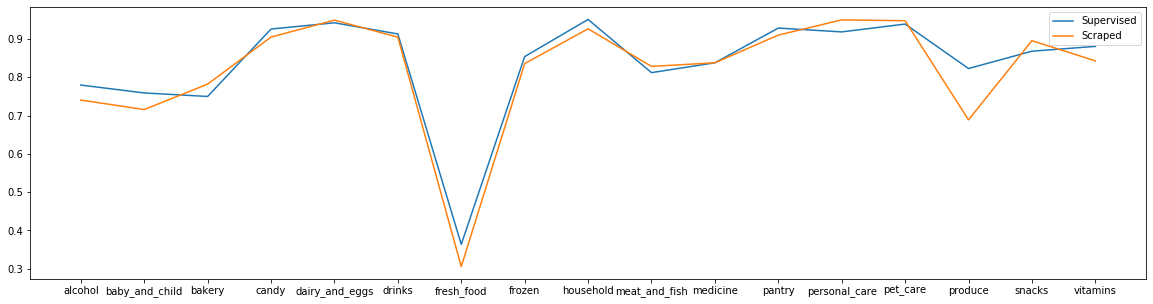

In [85]:
plot = l1_accs.plot(y=["Supervised Acc", "Scraped Acc"], figsize=(20, 5))
plot.set_xticks(range(len(l1_accs)))
plot.set_xticklabels(list(l1_accs.index))
plot

#### L2

In [54]:
weak_supervision_accuracies = pd.DataFrame(index=pd.MultiIndex.from_tuples(scraped_accs.keys()), columns=["Accuracy"])
supervised_accuracies = pd.DataFrame(index=pd.MultiIndex.from_tuples(doordash_accs.keys()), columns=["Accuracy"])

for (l1_id, l2_id), acc in scraped_accs.items():
    weak_supervision_accuracies.loc[l1_id, l2_id] = acc

for (l1_id, l2_id), acc in doordash_accs.items():
    supervised_accuracies.loc[l1_id, l2_id] = acc
    
weak_supervision_accuracies

Accuracy
pet_care cat_food             0.882353
         cat_toys_and_treats         0
         cat_treats               0.75
         dog_food             0.764706
         dog_treats               0.25
...                                ...
drinks   soda                 0.971311
         sparkling_water       0.78125
         sports               0.767123
         still_water          0.895954
         tea                   0.90991

[225 rows x 1 columns]

In [55]:
supervised_accuracies

Accuracy
pet_care cat_food             0.911765
         cat_toys_and_treats         1
         cat_treats                  0
         dog_food             0.852941
         dog_treats              0.875
...                                ...
drinks   soda                 0.971311
         sparkling_water      0.742188
         sports               0.856164
         still_water           0.83237
         tea                   0.81982

[225 rows x 1 columns]

In [56]:
class_data["Weak Supervision Accuracy"] = weak_supervision_accuracies
class_data["Supervised Accuracy"] = supervised_accuracies
print(class_data.sort_values('Doordash Train', ascending=False).to_string())

                                      Doordash Train  Doordash Test  Scraped Weak Supervision Accuracy Supervised Accuracy
L1 ID          L2 ID                                                                                                      
personal_care  makeup                         5694.0           55.0  17043.0                  0.981818            0.981818
               hair_care                      3037.0          120.0  12218.0                     0.925            0.983333
alcohol        wine                           2338.0          105.0     71.0                  0.952381            0.980952
vitamins       supplements                    2259.0           97.0   9396.0                  0.659794            0.814433
alcohol        beer                           2086.0          357.0     71.0                  0.901961            0.952381
personal_care  facial_care                    1770.0           80.0   8196.0                    0.7625              0.8375
snacks         c

In [57]:
# A view with L1's staying intact to quickly view groups.
print(class_data.sort_values(['L1 ID', 'Doordash Train'], ascending=False).to_string())

                                      Doordash Train  Doordash Test  Scraped Weak Supervision Accuracy Supervised Accuracy
L1 ID          L2 ID                                                                                                      
vitamins       supplements                    2259.0           97.0   9396.0                  0.659794            0.814433
               vitamins_a-z                    924.0          127.0    583.0                  0.724409            0.653543
               multivitamins                   734.0           11.0    523.0                  0.636364            0.545455
               homeopathy_and_immune           687.0            5.0     46.0                       0.2                 0.2
               aromatherapy                    527.0           58.0    187.0                  0.931034            0.913793
               minerals                        270.0           29.0      NaN                  0.793103            0.689655
               c

Confusion matrix for a given model

Predicted,entree,quick_meals,salad_and_soup,sandwiches,sides,All
Actual,,,,,,
entree,7,29,3,6,0,45
fresh_pizza,1,7,0,0,0,8
quick_meals,10,10,9,9,0,38
salad_and_soup,0,1,1,0,0,2
sandwiches,0,5,0,0,0,5
sides,7,2,7,0,8,24
sushi,4,0,0,0,0,4
trays,1,0,0,0,0,1
wings,1,4,0,1,0,6


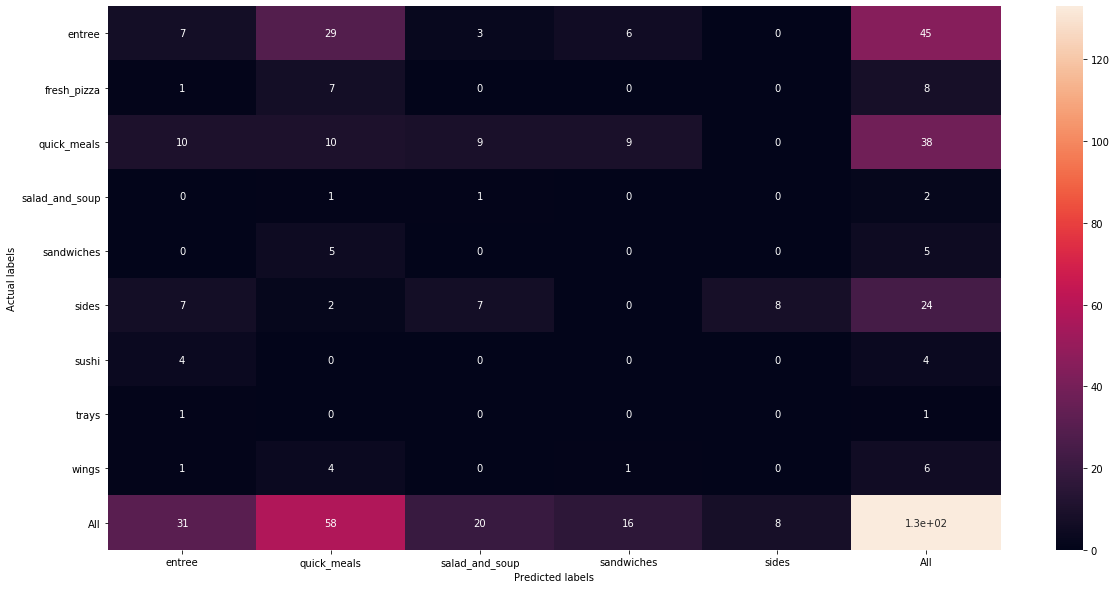

In [166]:
preds = predictions["fresh_food"]

# generate confusion matrix
confusion_matrix = pd.crosstab(preds["Category ID"], preds["Pred"], margins=True)

# Set indexes to class names 
confusion_matrix.index.name = "Actual"
confusion_matrix.columns.name = "Predicted"

# Normalize confusion matrix 
#normalized_confusion_matrix = confusion_matrix / confusion_matrix.sum(axis=1)

confusion_matrix

fig, ax = plt.subplots(figsize=(20, 10))
sns.heatmap(confusion_matrix, annot=True, ax=ax);

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('Actual labels') 

confusion_matrix

#### Aggregate score per model

For each model, weight each class according to frequency in total doordash distribution. Then multiply class accuracies accordingly.

In [99]:
doordash_all = class_data[["Doordash Train", "Doordash Test"]].sum(axis=1, min_count=1)
doordash_all

L1 ID     L2 ID        
alcohol   alcohol-free        2.0
          beer             2443.0
          liquor            834.0
          mixers             46.0
          seltzer           197.0
                            ...  
vitamins  minerals          299.0
          multivitamins     745.0
          sun_care            NaN
          supplements      2356.0
          vitamins_a-z     1051.0
Length: 215, dtype: float64

In [112]:
class_weights = pd.Series(index=doordash_all.index, dtype=float)
for l1, l2_df in doordash_all.groupby(level=0):
    class_weights[l1] = l2_df / l2_df.sum()

In [141]:
class_weights

L1 ID     L2 ID        
alcohol   alcohol-free     0.000324
          beer             0.396269
          liquor           0.135280
          mixers           0.007461
          seltzer          0.031955
                             ...   
vitamins  minerals         0.050117
          multivitamins    0.124874
          sun_care              NaN
          supplements      0.394904
          vitamins_a-z     0.176165
Length: 215, dtype: float64

In [142]:
weak_supervised_aggregate_scores = (class_weights * class_data["Weak Supervision Accuracy"]).groupby(level=0).sum()
supervised_aggregate_scores = (class_weights * class_data["Supervised Accuracy"]).groupby(level=0).sum()

In [146]:
aggregate_scores = pd.DataFrame({
    "Weak Supervised": weak_supervised_aggregate_scores,
    "Supervised": supervised_aggregate_scores
})

aggregate_scores.sort_values(["Weak Supervised"], ascending=False)

,Weak Supervised,Supervised
L1 ID,,
bakery,0.898788,0.906370
alcohol,0.885791,0.912747
personal_care,0.873960,0.892082
meat_and_fish,0.867255,0.891849
drinks,0.862110,0.839058
medicine,0.860968,0.852793
produce,0.837432,0.849135
dairy_and_eggs,0.831950,0.867861
candy,0.828620,0.841337
